#### Importing necessary libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import json # library to handle JSON files

 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Libraries imported.


#### Importing the basic cleaned data
Property prices of Mumbai City source:https://www.99acres.com/property-rates-and-price-trends-in-mumbai

In [4]:
pp_1=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Data/mumbai_property_price.csv")
pp_1 = pp_1[['Locality Name','buy_rate_avg','Rent_1B_avg','Rent_2B_avg','Rent_3B_avg']].dropna().head(10)

### Assigning Pincodes to each locality

In [5]:
url="https://nominatim.openstreetmap.org/search/Andheri%20Mumbai?format=json&addressdetails=1&limit=1&polygon_svg=1"
result=requests.get(url).json()
result[0]['lat']

'19.1196976'

In [6]:
pp_1['Longitude']=None
pp_1.head()

,Locality Name,buy_rate_avg,Rent_1B_avg,Rent_2B_avg,Rent_3B_avg,Longitude
0,4 Bunglows,19826.5,27625.0,45900.0,56767.5,None
1,Aarey Milk Colony,7543.5,18417.5,22277.0,26614.5,None
6,Airoli,10561.5,14259.0,22567.5,32742.0,None
10,Ambedkar Nagar,16235.0,25239.5,38675.0,56104.0,None
21,Andheri (East),16809.0,25478.5,39634.5,54910.0,None


In [5]:
# for index, row in pp_1.iterrows():

#     locality=row['Locality Name']

#     url="https://nominatim.openstreetmap.org/search/{}%20{}?format=json&addressdetails=1&limit=1&polygon_svg=1".format(locality,"Mumbai")
#     result=requests.get(url).json()
#     if result!=[]:
#         pp_1.loc[index,'Latitude']=result[0]['lat']
#         pp_1.loc[index,'Longitude']=result[0]['lon']

#     else:
#         pp_1.loc[index,'Latitude']=None
#         pp_1.loc[index,'Longitude']=None

        
#Assign Latitude and longitude row['Latitude']= lat_lng_coords[0] row['Longitude'] = lat_lng_coords[1]


In [6]:
# pp_1.head()

In [7]:
# pp_1.to_csv("pp_latlong.csv")

In [8]:
## importing from already saved csv file to save time and repeated API calls
# Dropping the locality for which the coordinates are not being able to be fetched

In [23]:
city_data=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Data/pp_latlong.csv")
city_data.tail()

,index,Locality Name,buy_rate,buy_rate_trim,buy_rate_lower,buy_rate_higher,buy_rate_avg,Buy Rates Q/Q,Rent_1B,Rent_1B_trim,...,Rent_2B_avg,Rent_2B_persqf,Rent_3B,Rent_3B_trim,Rent_3B_Lower,Rent_3B_Upper,Rent_3B_avg,Rent_3B_persqf,Latitude,Longitude
557,557,Worli,"Rs.32,852 - 38,462/sq. ft.","32,852 - 38,462",32852.0,38462.0,35657.0,2.48%,"Rs.26,392 - 34,808","26,392 - 34,808",...,81664.0,229%,"Rs.1,54,460 - 1,95,769","1,54,460 - 1,95,769",154460.0,195769.0,175114.5,491%,19.011696,72.818070
558,558,Y K Nagar,"Rs.5,100 - 5,398/sq. ft.","5,100 - 5,398",5100.0,5398.0,5249.0,0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.026298,72.873033
559,559,Yari Road,"Rs.18,530 - 20,825/sq. ft.","18,530 - 20,825",18530.0,20825.0,19677.5,-1.69%,"Rs.26,775 - 31,025","26,775 - 31,025",...,49929.0,254%,NaN,NaN,NaN,NaN,NaN,NaN,19.139402,72.807916
560,560,Yogi Nagar,"Rs.16,448 - 17,808/sq. ft.","16,448 - 17,808",16448.0,17808.0,17128.0,-0.48%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.235083,72.843713
561,561,Yogidham,"Rs.5,525 - 6,418/sq. ft.","5,525 - 6,418",5525.0,6418.0,5971.5,7.81%,"Rs.6,818 - 8,391","6,818 - 8,391",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
areas = city_data[['Locality Name','Latitude','Longitude']].dropna().drop_duplicates()

In [25]:
city_data = city_data.drop(['index'],axis=1)

city_data = city_data[city_data['Latitude'].notna()]
print(city_data.shape)
city_data.head()

(374, 27)


,Locality Name,buy_rate,buy_rate_trim,buy_rate_lower,buy_rate_higher,buy_rate_avg,Buy Rates Q/Q,Rent_1B,Rent_1B_trim,Rent_1B_Lower,...,Rent_2B_avg,Rent_2B_persqf,Rent_3B,Rent_3B_trim,Rent_3B_Lower,Rent_3B_Upper,Rent_3B_avg,Rent_3B_persqf,Latitude,Longitude
1,Aarey Milk Colony,"Rs.7,225 - 7,862/sq. ft.","7,225 - 7,862",7225.0,7862.0,7543.5,4.71%,"Rs.16,371 - 20,464","16,371 - 20,464",16371.0,...,22277.0,295%,"Rs.23,899 - 29,330","23,899 - 29,330",23899.0,29330.0,26614.5,353%,19.156129,72.870722
2,Abhyudaya Nagar,"Rs.26,605 - 28,858/sq. ft.","26,605 - 28,858",26605.0,28858.0,27731.5,NaN,NaN,NaN,NaN,...,66174.5,239%,NaN,NaN,NaN,NaN,NaN,NaN,18.990477,72.844057
6,Airoli,"Rs.9,775 - 11,348/sq. ft.","9,775 - 11,348",9775.0,11348.0,10561.5,2.48%,"Rs.13,090 - 15,428","13,090 - 15,428",13090.0,...,22567.5,214%,"Rs.30,559 - 34,925","30,559 - 34,925",30559.0,34925.0,32742.0,310%,19.158515,72.999402
8,Alika Nagar,"Rs.13,558 - 15,342/sq. ft.","13,558 - 15,342",13558.0,15342.0,14450.0,3.95%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.198397,72.874267
10,Ambedkar Nagar,"Rs.15,470 - 17,000/sq. ft.","15,470 - 17,000",15470.0,17000.0,16235.0,3.87%,"Rs.23,990 - 26,489","23,990 - 26,489",23990.0,...,38675.0,238%,"Rs.52,190 - 60,018","52,190 - 60,018",52190.0,60018.0,56104.0,346%,19.070822,72.828865


### Plotting data to check how much extent is covered by the extracted lat longs

In [26]:
##setting the mean latitude and longitude for the area under consideration

In [27]:
latitude =areas.Latitude.mean()
longitude =areas.Longitude.mean()
print(latitude,longitude)

19.083322528337874 72.945444281626


In [28]:
# Plotting coordinates to check to what extent the area is covered by sample space
# city_data.Longitude.isna().sum()

In [29]:

venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around center



# add coordinates to the map as blue circle markers
for lat, lng, label in zip(areas.Latitude, areas.Longitude, areas['Locality Name']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.7
        ).add_to(venues_map)

venues_map

In [16]:
# creating easy to read labels for each coordinates with Locality rates and average property price

In [30]:
city_pp=city_data[['Locality Name','buy_rate_avg','Latitude','Longitude']]
city_pp['price_label']=city_pp['Locality Name']+" -Rs."+city_pp['buy_rate_avg'].astype(str)+"/sq.ft"
city_pp.dropna()
city_pp.head()

,Locality Name,buy_rate_avg,Latitude,Longitude,price_label
1,Aarey Milk Colony,7543.5,19.156129,72.870722,Aarey Milk Colony -Rs.7543.5/sq.ft
2,Abhyudaya Nagar,27731.5,18.990477,72.844057,Abhyudaya Nagar -Rs.27731.5/sq.ft
6,Airoli,10561.5,19.158515,72.999402,Airoli -Rs.10561.5/sq.ft
8,Alika Nagar,14450.0,19.198397,72.874267,Alika Nagar -Rs.14450.0/sq.ft
10,Ambedkar Nagar,16235.0,19.070822,72.828865,Ambedkar Nagar -Rs.16235.0/sq.ft


In [31]:
## grouping the data by latitude and longitude if in case there is some repeatation in the data

In [32]:
city_plot=city_pp[['Latitude','Longitude','buy_rate_avg']]
city_plot.head()

,Latitude,Longitude,buy_rate_avg
1,19.156129,72.870722,7543.5
2,18.990477,72.844057,27731.5
6,19.158515,72.999402,10561.5
8,19.198397,72.874267,14450.0
10,19.070822,72.828865,16235.0


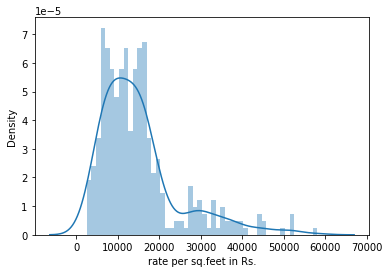

In [33]:
## Checking the distribution of average price per square feet on a histogram

x=sns.distplot(city_pp['buy_rate_avg'], label='rate per square feet', bins=50, norm_hist=True, axlabel='rate per sq.feet in Rs.')

### clustering by price

In [34]:
##Generating Heatmap based on the price
city_plot = city_plot.dropna(axis=0)

In [35]:
from folium.plugins import HeatMap

max_amount = float(city_plot['buy_rate_avg'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=11,)

hm_wide = HeatMap( list(zip(city_plot.Latitude, city_plot.Longitude, city_plot['buy_rate_avg'])),
                   min_opacity=0.5,
                   max_val=45000,
                   radius=10, 
                   blur=10,
                   max_zoom=5, 
                 )

hmap.add_child(hm_wide)
for lat, lng, label in zip(city_pp.Latitude, city_pp.Longitude, city_pp['price_label']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(hmap)
hmap

In [36]:
## Binning the property prices into bins so that they can be mapped as a cluster on geo-map

In [37]:
bins= np.linspace(min(city_pp["buy_rate_avg"]),max(city_pp["buy_rate_avg"]),10)
group_names=range(1,10)
city_pp['price_binned']=pd.cut(city_pp['buy_rate_avg'],bins,labels=group_names,include_lowest=True)

In [38]:
city_pp.sort_values('price_binned',inplace=True)
city_pp.head()

,Locality Name,buy_rate_avg,Latitude,Longitude,price_label,price_binned
1,Aarey Milk Colony,7543.5,19.156129,72.870722,Aarey Milk Colony -Rs.7543.5/sq.ft,1
172,Kalyan (West),5695.0,19.137892,72.810668,Kalyan (West) -Rs.5695.0/sq.ft,1
171,Kalyan (East),5142.5,19.137892,72.810668,Kalyan (East) -Rs.5142.5/sq.ft,1
168,Kalu Nagar,5610.0,19.006276,72.819125,Kalu Nagar -Rs.5610.0/sq.ft,1
165,Kalamboli,6353.5,19.035831,73.103480,Kalamboli -Rs.6353.5/sq.ft,1


In [39]:
## Genrating the map with the clustered prices color coded.

In [57]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='cartodbpositron')

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.Blues(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, tag, cluster in zip(city_pp['Latitude'], city_pp['Longitude'], city_pp['price_label'],city_pp['price_binned']):
    label = folium.Popup(str(tag), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        blur=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)

map_clusters

# Using four square apis to get venue details

In [41]:
CLIENT_ID = 'CUBZ5XYI4L2HOLQKUIK40C4X3HMUHPVAF3AWZB53P1X4VRUF' 
CLIENT_SECRET = '4MRD40YT25F5G2M2ODZQOSSMEWS1FCKKCGUNFN1KDRGYFFJZ'
VERSION = '20180323'
radius=1000
LIMIT=100



url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=CUBZ5XYI4L2HOLQKUIK40C4X3HMUHPVAF3AWZB53P1X4VRUF&client_secret=4MRD40YT25F5G2M2ODZQOSSMEWS1FCKKCGUNFN1KDRGYFFJZ&ll=19.083322528337874,72.945444281626&v=20180323&radius=1000&limit=100'

In [42]:
results = requests.get(url).json()

In [43]:
results

{'meta': {'code': 200, 'requestId': '60101ebd3cdc3e1394024a6c'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 19.092322537337882,
    'lng': 72.95494987484169},
   'sw': {'lat': 19.074322519337866, 'lng': 72.9359386884103}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [44]:
items=results['response']['groups'][0]['items']
items

[]

In [45]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [46]:
city_call=city_pp[['Locality Name','Latitude','Longitude']].drop_duplicates()
city_call.shape

(367, 3)

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if results!=[]:
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
# Mumbai_venues = getNearbyVenues(names=city_call['Locality Name'],
#                                    latitudes=city_call['Latitude'],
#                                    longitudes=city_call['Longitude']
#                                   )

In [49]:
# Mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,19.156129,72.870722,The Westin Mumbai Garden City,19.172654,72.860518,Hotel
1,Aarey Milk Colony,19.156129,72.870722,PVR Cinemas,19.174016,72.860485,Multiplex
2,Aarey Milk Colony,19.156129,72.870722,Starbucks,19.174177,72.860350,Coffee Shop
3,Aarey Milk Colony,19.156129,72.870722,The Fern - An Eco Hotel,19.162362,72.856972,Hotel
4,Aarey Milk Colony,19.156129,72.870722,Eighteen Lounge and Bar,19.172648,72.860513,Hotel Bar


In [50]:
# Mumbai_venues.to_csv(r"Mumbai_venues.csv")

# Stored the venue details on git to do away with the need of calling the apis over and over again

In [51]:
city_venues=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Data/Mumbai_venues.csv")
city_venues.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Aarey Milk Colony,19.156129,72.870722,The Westin Mumbai Garden City,19.172654,72.860518,Hotel
1,1,Aarey Milk Colony,19.156129,72.870722,PVR Cinemas,19.174016,72.860485,Multiplex
2,2,Aarey Milk Colony,19.156129,72.870722,Film City,19.160960,72.886177,Event Space
3,3,Aarey Milk Colony,19.156129,72.870722,Starbucks,19.174177,72.860350,Coffee Shop
4,4,Aarey Milk Colony,19.156129,72.870722,British Brewing Company (BBC),19.174186,72.860504,Brewery


In [52]:
venue_count= city_venues[['Neighborhood','Venue']].groupby('Neighborhood', as_index=False).count()
venue_count.rename(columns={'Neighborhood':'Locality Name'},inplace=True)
venue_count

,Locality Name,Venue
0,Aarey Milk Colony,59
1,Abhyudaya Nagar,100
2,Airoli,21
3,Alika Nagar,62
4,Ambedkar Nagar,100
...,...,...
362,Walkeshwar,100
363,Worli,76
364,Y K Nagar,97
365,Yari Road,100


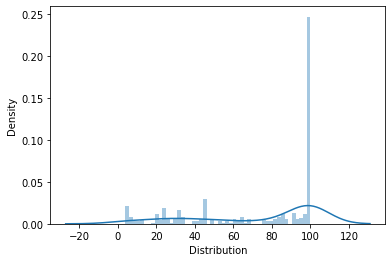

In [53]:
## Checking the distribution of venues

x=sns.distplot(venue_count['Venue'], label='number of venues', bins=50, norm_hist=True, axlabel='Distribution')

In [54]:
venue_plot=pd.merge(venue_count,city_pp,on='Locality Name', how='left')
venue_plot.drop(['price_label'],1,inplace=True)
venue_plot.drop_duplicates(inplace=True)

In [55]:
from folium.plugins import HeatMap

max_amount = float(venue_plot['Venue'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=11,)

hm_wide = HeatMap( list(zip(venue_plot.Latitude, venue_plot.Longitude, venue_plot['Venue'])),
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=7, 
                   blur=10,
                   max_zoom=5, 
                 )

hmap.add_child(hm_wide)
for lat, lng, label in zip(venue_plot.Latitude, venue_plot.Longitude, venue_plot['Locality Name']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(hmap)
hmap